In [107]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

In [313]:
#Read the CSV file.
xdf = pd.read_csv('CompanyX_EU.csv')

In [314]:
xdf.describe()

,Startup,Product,Funding,Event,Result,OperatingState
count,662,656,448,662,662,662
unique,662,656,240,26,5,4
top,Crowd Fusion,spawnlabs.com,$1M,TC50 2008,Contestant,Operating
freq,1,1,17,52,488,465


In [315]:
#Check the datatypes of each attribute
xdf.dtypes

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

In [316]:
#Check for null values in the attributes.
xdf.isnull().sum()

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

In [317]:
#Drop the null values
new_xdf = xdf.dropna()

In [318]:
#Convert the ‘Funding’ features to a numerical value
temp = new_xdf.Funding.apply(lambda x: x[len(x)-1:len(x)]).unique() #This suggest Fundings are in thousands, millions and billions
new_xdf['Funding']= new_xdf.Funding.apply(lambda x: x.replace('K','000'))
new_xdf['Funding']= new_xdf.Funding.apply(lambda x: x.replace('M','000000'))
new_xdf['Funding']= new_xdf.Funding.apply(lambda x: x.replace('B','000000000'))
new_xdf['Funding']= new_xdf.Funding.apply(lambda x: x.replace('.',''))

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [319]:
new_xdf['Funding'] = new_xdf.Funding.apply(lambda x: x[1:len(x)])

c:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [320]:
#Convert the ‘Funding’ features to a numerical value
new_xdf['Funding'] = new_xdf.Funding.apply(pd.to_numeric)

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0.5, 0, 'Fundings in Million(s)')]

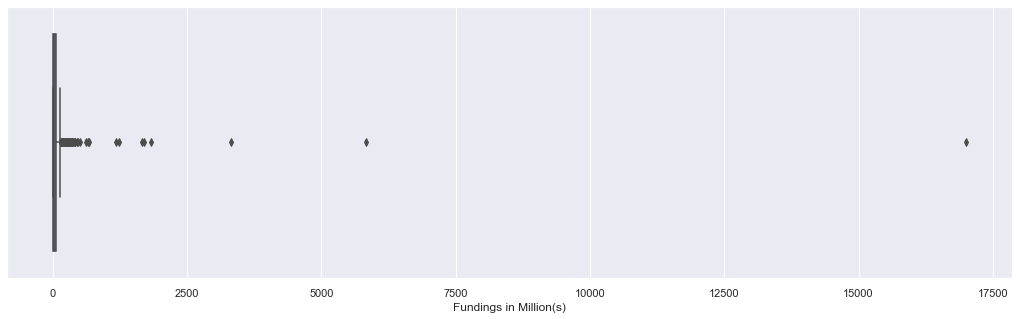

In [321]:
a4_dims = (18, 5)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x=new_xdf['Funding']*(10**-6), ax=ax)
g.set(xlabel="Fundings in Million(s)")

In [322]:
#Get the lower fence from the box plot
new_xdf.describe()

,Funding
count,4.460000e+02
mean,1.264404e+08
std,8.794959e+08
min,5.000000e+03
25%,8.792500e+05
50%,1.400000e+07
75%,5.800000e+07
max,1.700000e+10


In [323]:
#Lower fence
lowerfence = 8.792500*100000 - (1.5*(5.800000*10000000 - 8.792500*100000))
lowerfence

-84801875.0

In [324]:
#Check number of outliers greater than upper fence
#Calculate upper fence
upperfence = 5.800000*10000000 + (1.5*(5.800000*10000000 - 8.792500*100000))
new_xdf[new_xdf['Funding'] > upperfence].count()

Startup           54
Product           54
Funding           54
Event             54
Result            54
OperatingState    54
dtype: int64

In [325]:
'''It seems there are 54 outliers greater than the upper fence'''

'It seems there are 54 outliers greater than the upper fence'

In [326]:
#Drop the values that are greater than upper fence.
new_xdf= new_xdf[new_xdf['Funding'] <= upperfence]

In [327]:
new_xdf.count()

Startup           392
Product           392
Funding           392
Event             392
Result            392
OperatingState    392
dtype: int64

[Text(0.5, 0, 'Fundings in Million(s)')]

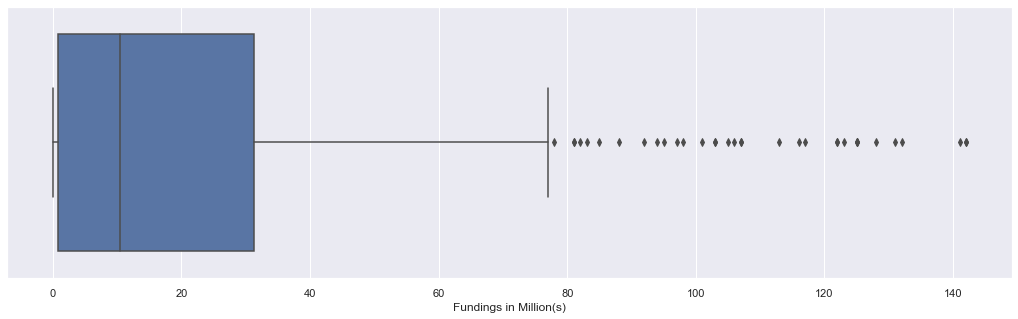

In [328]:
a4_dims = (18, 5)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(x=new_xdf['Funding']*(10**-6), ax=ax)
g.set(xlabel="Fundings in Million(s)")

In [329]:
#Check frequency of the OperatingState features classes.
new_xdf['OperatingState'].value_counts()

Operating    283
Acquired      54
Closed        54
Ipo            1
Name: OperatingState, dtype: int64

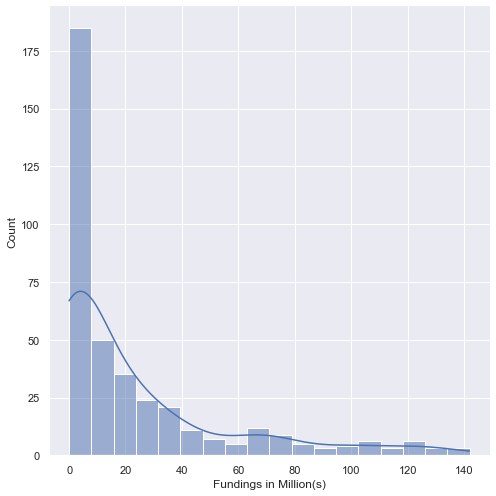

In [330]:
#Plot a distribution plot for Funds in million
g = sns.displot(new_xdf['Funding']*(10**-6), kde=True, height=7);
g.set(xlabel='Fundings in Million(s)')

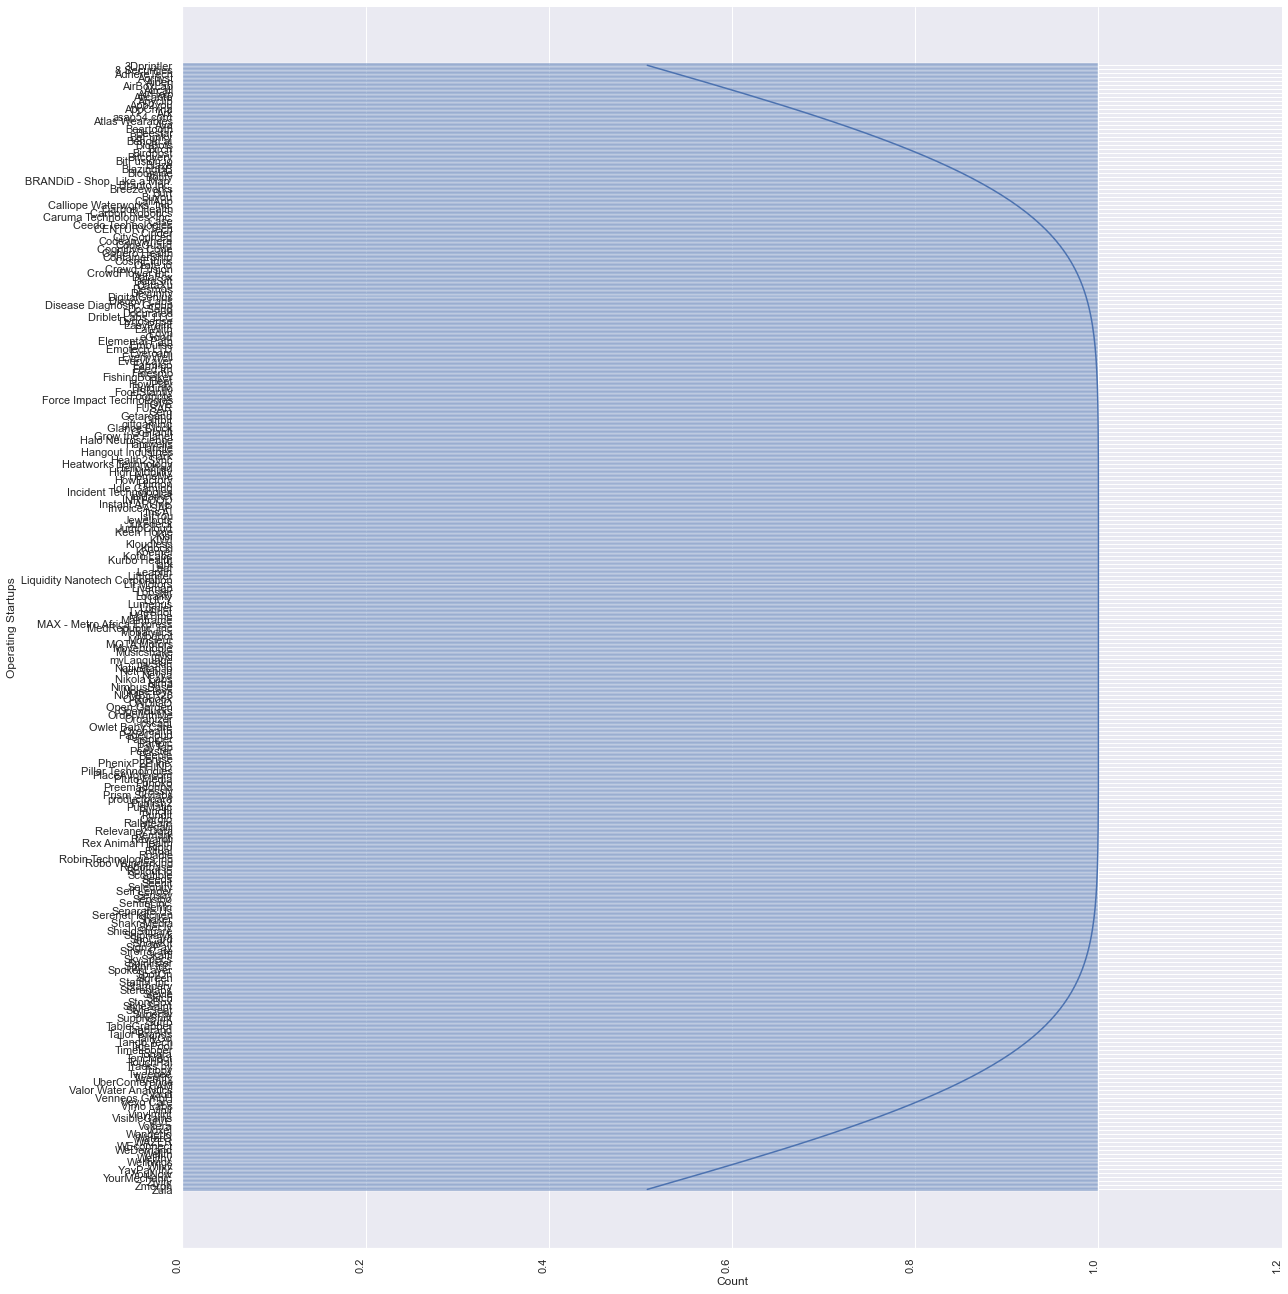

In [331]:
#Plot distribution plots for companies still operating and companies that closed
temp = new_xdf[(new_xdf['OperatingState'] == "Operating")] 
g = sns.displot(y=temp['Startup'], kde=True, height=18);
g.set_xticklabels(rotation=90, ha="right")
g.set(ylabel = 'Operating Startups')

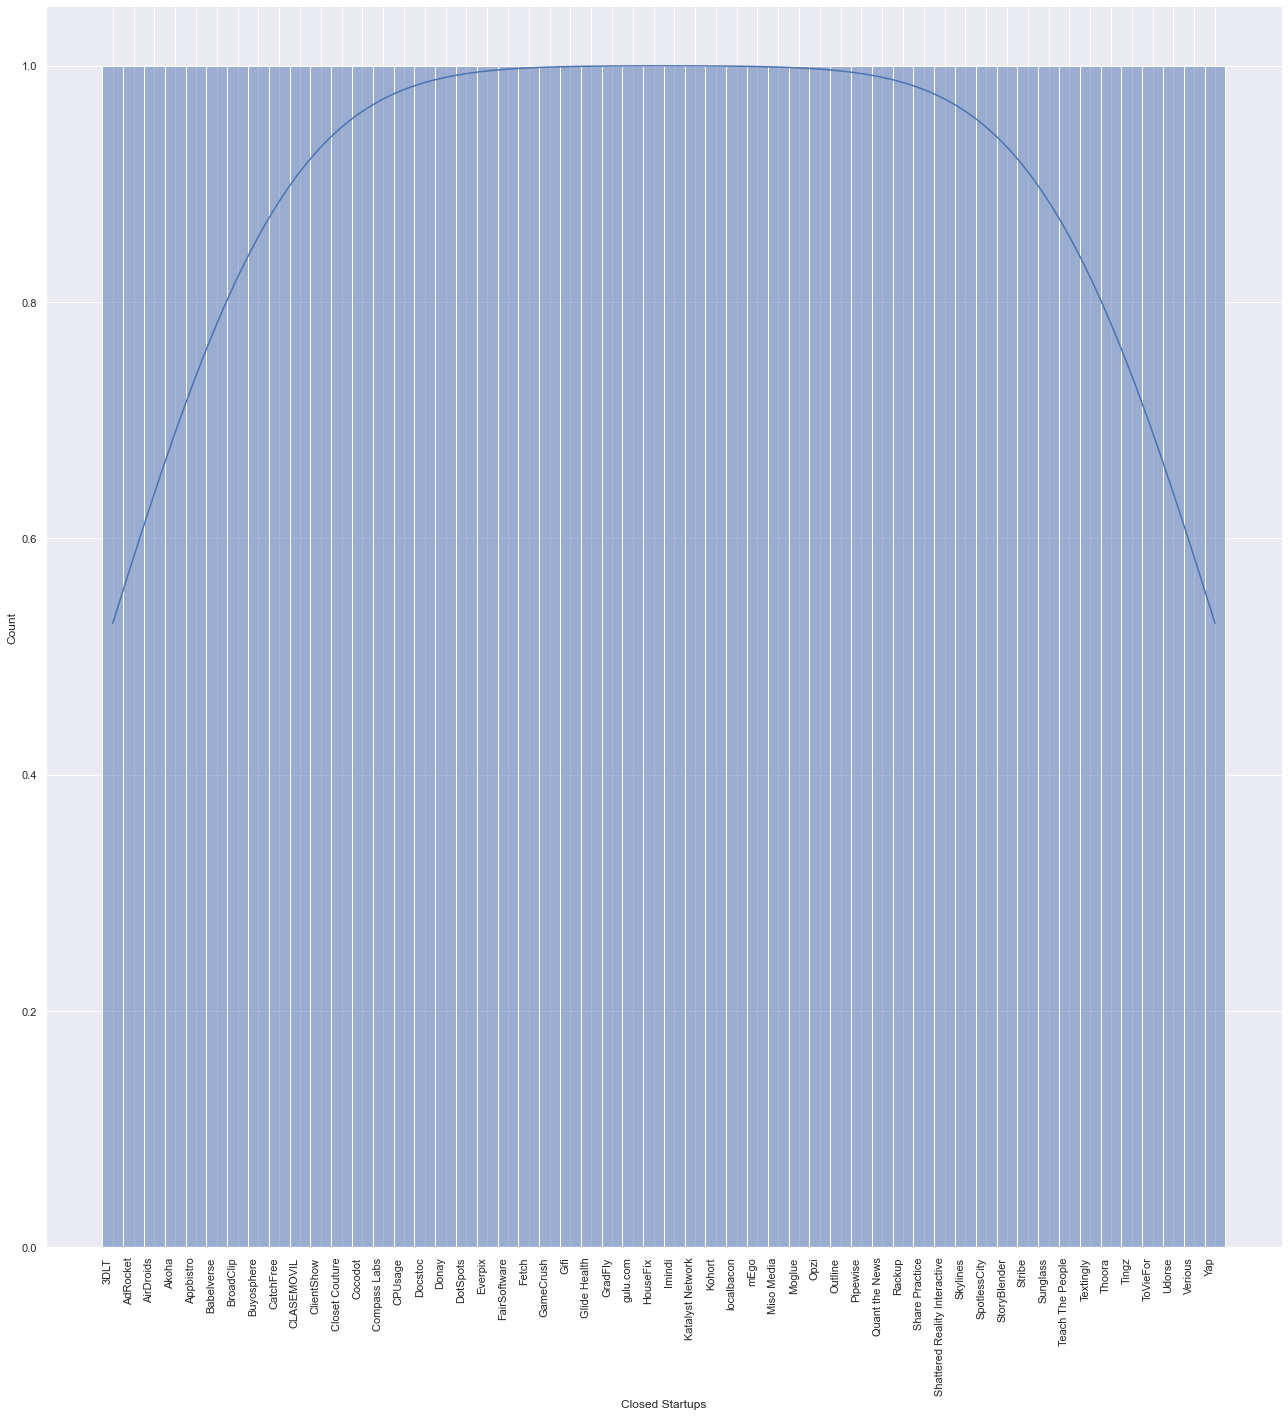

In [332]:
temp = new_xdf[(new_xdf['OperatingState'] == "Closed")] 
g = sns.displot(x=temp['Startup'], kde=True, height=18);
g.set_xticklabels(rotation=90, ha="right")
g.set(xlabel='Closed Startups')

In [333]:
#• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down?
#Write the null hypothesis and alternative hypothesis.
'''Null Hypothesis: There is no difference between Funds raised by operating companies and Funds raised by closed companies.
Alternative Hypothesis: Funds raised by operating companies and funds raised by closed companies are not equal.'''

'Null Hypothesis: There is no difference between Funds raised by operating companies and Funds raised by closed companies.\nAlternative Hypothesis: Funds raised by operating companies and funds raised by closed companies are not equal.'

In [387]:
new_xdf.count()

Startup           392
Product           392
Funding           392
Event             392
Result            392
OperatingState    392
dtype: int64

In [398]:
#Collecting 2 samples where OperatingState is Operationg (Group 1) and OperatingState is Closed(Group2)
sample = new_xdf.sample(n=40)
group1 = sample[(sample['OperatingState'] == "Operating")]
group1 = group1['Funding']
group2 = sample[(sample['OperatingState'] == "Closed")]
group2 = group2['Funding']

In [399]:
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

1.4768985125450451 0.14918319020449997


#### Lets consider level of significance(alpha) = 0.05

# alpha = 0.05
print(alpha < p_value)

#### Above observation that we have failed to in rejecting Null hypothesis. Therefore, we accept Null hypothesis which states Funds raised by operating companies and funds raised by closed companies are equal.

In [400]:
#Make a copy of the original data frame.
originalDF = xdf.copy()

In [401]:
#Check frequency distribution of Result variable.
originalDF['Result'].value_counts()

Contestant         488
Finalist            84
Audience choice     41
Winner              26
Runner up           23
Name: Result, dtype: int64

In [402]:
#Calculate percentage of winners that are still operating and percentage of contestants that are still operating
temp = originalDF[(originalDF['OperatingState'] == 'Operating')]
#Winner %
temp[temp['Result'] == 'Winner']['Result'].count() / temp['OperatingState'].count()*100

4.086021505376344

In [403]:
#Contestant %
temp[temp['Result'] == 'Contestant']['Result'].count() / temp['OperatingState'].count()*100

71.3978494623656

### Write your hypothesis comparing the proportion of companies that are operating between winners and contestants


#### Null hypothesis- Proportion of Companies that are operating between winners and contestants is equal

#### Alternative hypothesis- Proportion of Companies that are operating between winners and contestants is NOT equal

In [404]:
group1 = originalDF[(originalDF['OperatingState'] == "Operating") & (originalDF['Result'] == "Winner")]
group1['Result'].count()

19

In [405]:
group2 = originalDF[(originalDF['OperatingState'] == "Operating") & (originalDF['Result'] == "Contestant")]

group2['Result'].count()

332

#### Consider level of significance(alpha) = 0.05

In [406]:
import scipy.stats as stats
import scipy
arr =  scipy.array([19,332])
n = arr.sum()
#multiply by % of winners and contestants
expected_values    = scipy.array([n*0.048, n*.714])

chi_square_stat, p_value = stats.chisquare(arr, f_exp=expected_values)

print('At 5 %s level of significance, the p-value is %1.9f' %('%', p_value))

At 5 % level of significance, the p-value is 0.000000237


c:\python\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  


#### Here p-value (0.000000237) is considerabily less than alpha (0.05), therefore we reject the null hypothesis. This results in acceptance of Alternate hypothesis i.e. Proportion of Companies that are operating between winners and contestants is NOT equal.

In [407]:
#Check distribution of the Event variable
originalDF['Event'].value_counts()

TC50 2008                    52
TC50 2009                    50
TC40 2007                    40
Disrupt NYC 2011             32
Disrupt NYC 2013             31
Disrupt SF 2013              31
Disrupt SF 2011              31
Disrupt NYC 2012             30
Disrupt SF 2012              30
Disrupt SF 2014              28
Disrupt SF 2015              27
Disrupt NYC 2014             27
Disrupt SF 2010              26
Disrupt NY 2015              26
Disrupt SF 2016              26
Disrupt NYC 2010             22
Disrupt NY 2016              22
Disrupt Beijing 2011         18
Hardware Battlefield 2015    15
Disrupt EU 2014              15
Disrupt EU 2013              15
Disrupt London 2015          15
Hardware Battlefield 2014    14
-                            13
Disrupt London 2016          13
Hardware Battlefield 2016    13
Name: Event, dtype: int64

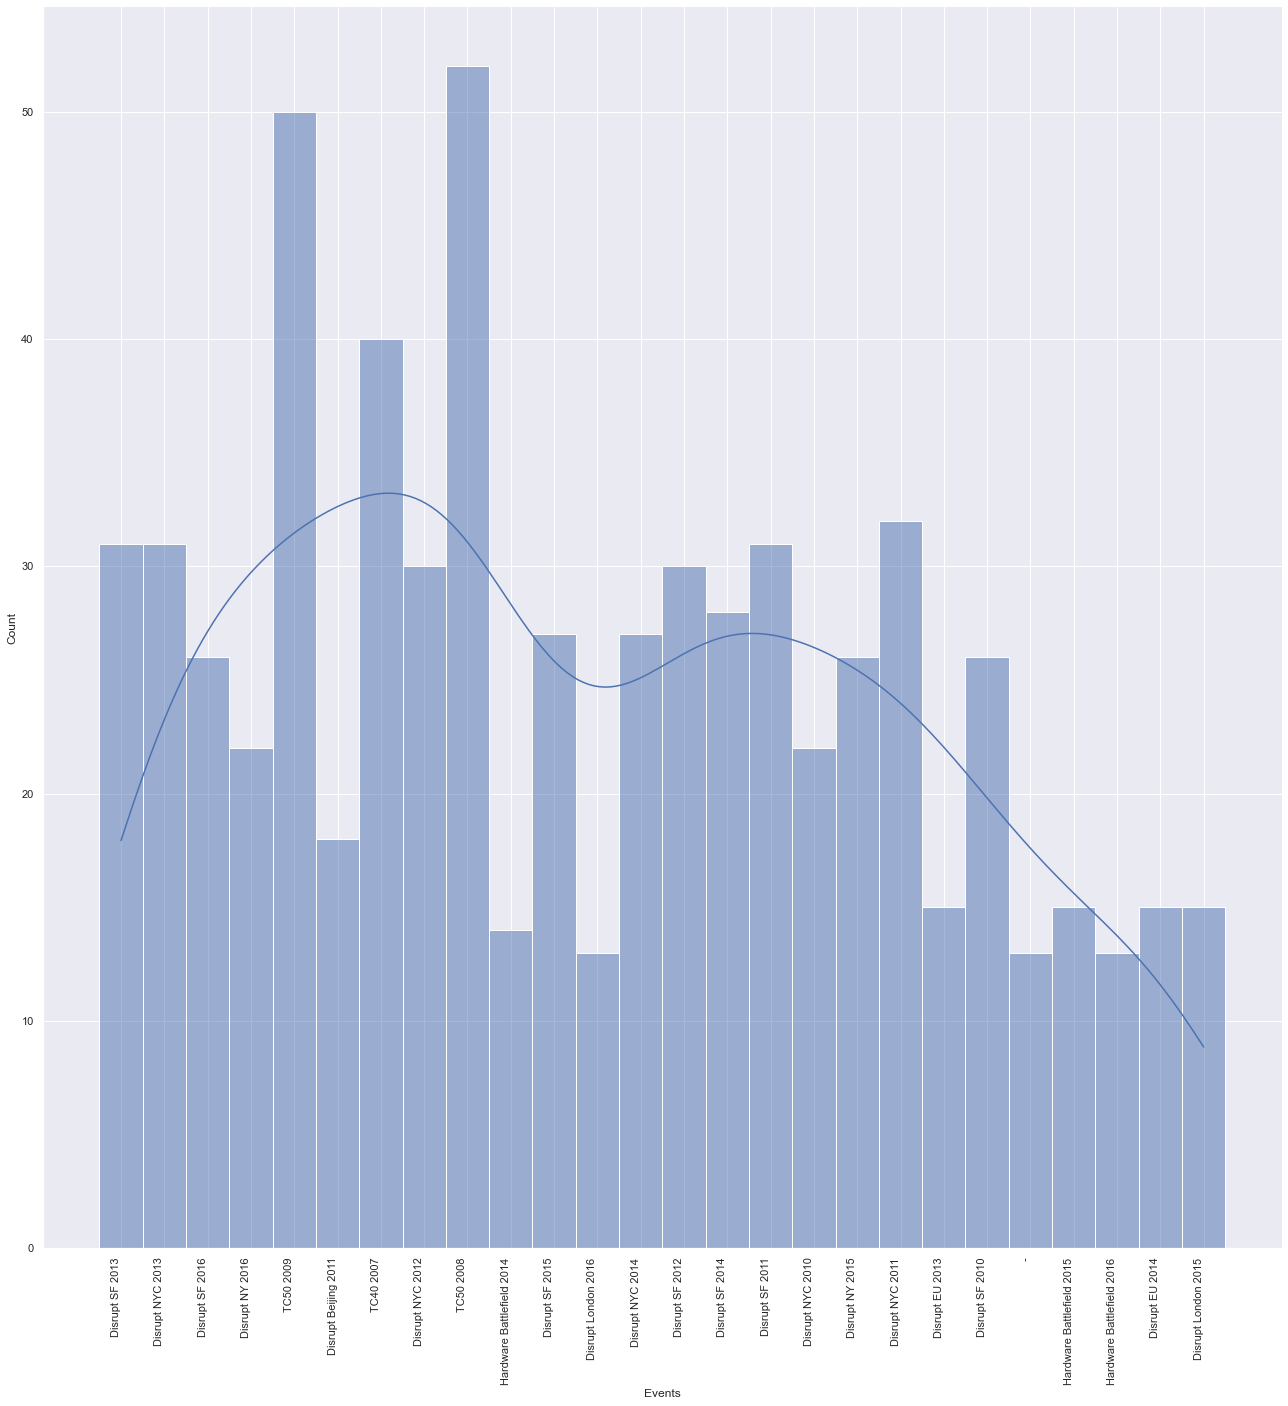

In [408]:
g = sns.displot(x=originalDF['Event'], kde=True, height=18);
g.set_xticklabels(rotation=90, ha="right")
g.set(xlabel='Events')

In [409]:
#Select only the Event that has disrupt keyword from 2013 onwards
years = ["2013","2014","2015","2017"]
originalDF['ReqEvent']= originalDF.Event.apply(lambda x: ('Disrupt' in x) and (any(year in x for year in years)))
newdf = originalDF[originalDF['ReqEvent'] != False]

In [410]:
newdf

,Startup,Product,Funding,Event,Result,OperatingState,ReqEvent
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating,True
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,True
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating,True
13,Agrilyst,agrilyst.com,$1M,Disrupt SF 2015,Winner,Operating,True
16,Aircall,aircall.io,$11.6M,Disrupt SF 2015,Contestant,Operating,True
...,...,...,...,...,...,...,...
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,True
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating,True
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating,True
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating,True


In [413]:
#Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from2013 onwards
cities = ["NY","SF","EU"]
sample = new_xdf.sample(n =60)
sample['ReqEvent2']= sample.Event.apply(lambda x: (any(city in x for city in cities)) and (any(year in x for year in years)))
sample.head()

,Startup,Product,Funding,Event,Result,OperatingState,ReqEvent2
409,Peeple,peeple.io,156000,Hardware Battlefield 2015,Runner up,Operating,False
211,Giftbit,giftbit.com,19000000,Disrupt SF 2016,Contestant,Operating,False
474,Seenit,seenit.io,14000000,Disrupt London 2016,Winner,Operating,False
503,Skylines,skylines.io,700000,Disrupt NYC 2011,Contestant,Closed,False
591,Trippy,trippy.com,53000000,Disrupt SF 2011,Contestant,Operating,False


In [414]:
data = sample[sample['ReqEvent2'] != False]

In [415]:
data

,Startup,Product,Funding,Event,Result,OperatingState,ReqEvent2
145,Disease Diagnostic Group,diseasediagnostic.com,13000000,Disrupt EU 2014,Runner up,Operating,True
575,TidePool,tidepool.co,15000000,Disrupt SF 2013,Contestant,Operating,True
207,Gem,gem.co,125000000,Disrupt SF 2014,Contestant,Operating,True
621,VIVE,vive.co,23000000,Disrupt NY 2015,Contestant,Operating,True
476,Self Lender,selflender.com,2000000,Disrupt SF 2014,Contestant,Operating,True
13,Agrilyst,agrilyst.com,1000000,Disrupt SF 2015,Winner,Operating,True
379,NUMBER26,n26.com,107000000,Disrupt EU 2014,Contestant,Operating,True
289,Kisi,getkisi.com,16000000,Disrupt NYC 2013,Contestant,Operating,True
53,Beestar,beestar.eu,320000,Disrupt SF 2013,Contestant,Operating,True
290,KIWI,kiwi.ki,44000000,Disrupt EU 2013,Contestant,Operating,True


#### Null hypothesis-  The funds raised by companies across NY, SF and EU events from 2013 onwards are equal

#### Alternate hypothesis-  The funds raised by companies across NY, SF and EU events from 2013 onwards are NOT equal

In [416]:
dataForSF = data[data.Event.apply(lambda x: 'SF' in x)]['Funding']

In [417]:
dataForSF=dataForSF.dropna()

In [418]:
dataForNY =  data[data.Event.apply(lambda x: 'NY' in x)]['Funding']

In [419]:
dataForNY = dataForNY.dropna()

In [420]:
dataForEU = data[data.Event.apply(lambda x: 'EU' in x)]['Funding']

In [421]:
dataForEU = dataForEU.dropna()

In [422]:
print('Count, Mean and standard deviation of Funds raised from events across SF after 2013: %3d, %3.2f and %3.2f' % (len(dataForSF ), dataForSF .mean(),np.std(dataForSF ,ddof =1)))
print('Count, Mean and standard deviation of Funds raised from events across NY after 2013r: %3d, %3.2f and %3.2f' % (len(dataForNY), dataForNY.mean(),np.std(dataForNY,ddof =1)))
print('Count, Mean and standard deviation of Funds raised from events across EU after 2013: %3d, %3.2f and %3.2f' % (len(dataForEU), dataForEU.mean(),np.std(dataForEU,ddof =1)))

Count, Mean and standard deviation of Funds raised from events across SF after 2013:   8, 18379750.00 and 43362186.69
Count, Mean and standard deviation of Funds raised from events across NY after 2013r:   6, 11833333.33 and 7678975.63
Count, Mean and standard deviation of Funds raised from events across EU after 2013:   4, 41068750.00 and 47635794.38


In [423]:
meanFundings = pd.DataFrame()

df1            = pd.DataFrame({'Event_in': 'SF', 'Fundings':dataForSF})
df2            = pd.DataFrame({'Event_in': 'NY', 'Fundings':dataForNY})
df3            = pd.DataFrame({'Event_in': 'EU', 'Fundings':dataForEU})

In [424]:
meanFundings=meanFundings.append(df1)
meanFundings=meanFundings.append(df2)
meanFundings=meanFundings.append(df3)

In [425]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
mod = ols('Fundings ~ Event_in', data = meanFundings).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq    df         F   PR(>F)
Event_in  2.169078e+15   2.0  0.802795  0.46642
Residual  2.026429e+16  15.0       NaN      NaN


#### Value of p is 0.46642 in above example. Considering alpha = 0.05, p is > alpha, hence we fail to reject the null hypothesis. Therefore, The funds raised by companies across NY, SF and EU events from 2013 onwards are equal.

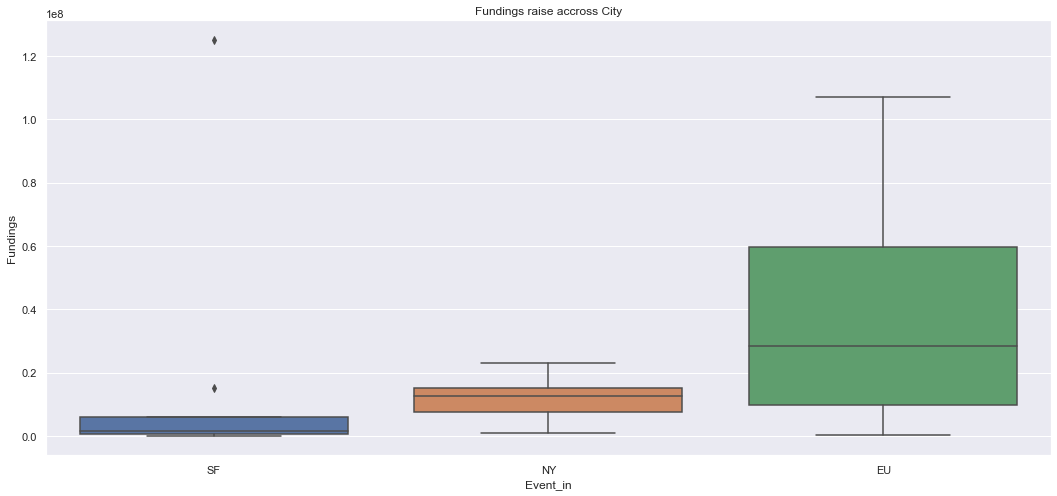

In [426]:
#Plot the distribution plot comparing the 3 city events
a4_dims = (18, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x = "Event_in", y = "Fundings", data = meanFundings,ax=ax)
plt.title('Fundings raise accross City')
plt.show()

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

<AxesSubplot:title={'center':'EU'}, xlabel='Funding', ylabel='Density'>

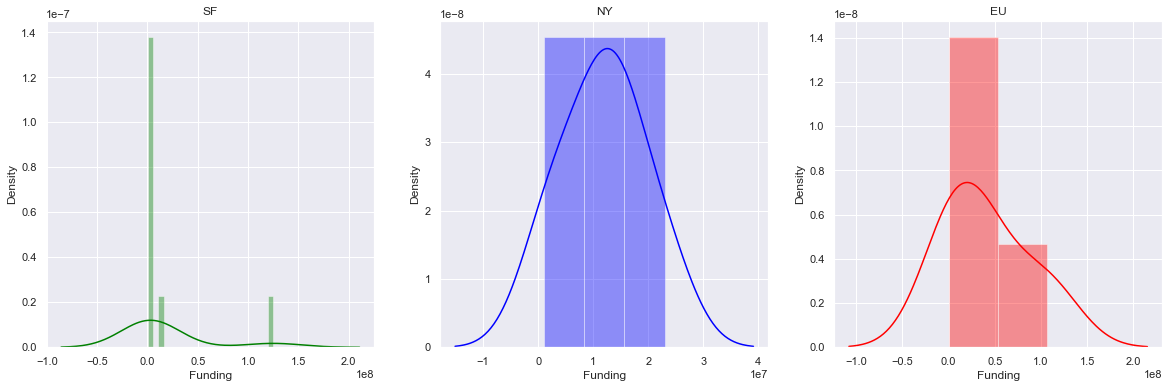

In [427]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('SF')
sns.distplot(dataForSF,color='green')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('NY')
sns.distplot(dataForNY,color='blue')

# subplot 3l
plt.subplot(1, 3, 3)
plt.title('EU')
sns.distplot(dataForEU,color='red')

### Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform a better data analysis

#### Improvements comes where data has been cleaned. 

#### Value of funding should have been numeric from the start. Adding currency sign and million/billion signs is not required. Numeric data is easier for analysis.

#### Quantity of data could have been more, for more accurate analysis. 

#### For this particular analysis, Product data was not used and could have been dropped 

#### Year of the Event could have been put into another Column of type numeric for easier analysis 